# Movie voting story

## Data Collecting and Data Cleaning

### import libraries 

In [181]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import transforms
import seaborn as sns #statistical plotting
from ast import literal_eval #turn JSON into List
# from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
# from sklearn.dummy import DummyClassifier, DummyRegressor
# from sklearn.model_selection import train_test_split
# from xgboost import XGBClassifier, XGBRegressor

import warnings; warnings.simplefilter('ignore')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

### read metadata and take a glimpse

In [149]:
folder = 'the-movies-dataset/'
md = pd.read_csv(folder + 'movies_metadata.csv')
md.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [55]:
md.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### processing: generate year from release_date

In [57]:
md['release_date'].head()

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-02-10
Name: release_date, dtype: object

In [58]:
md['year'] = (pd.to_datetime(md['release_date'], errors='coerce').
              apply(lambda x: str(x).split('-')[0]
                    if x != np.nan else np.nan))

## Voting VS. Popularity
We may hear that a movie community differs from the public opinion: a popular movie may not have many rating votes or, a cult movie has many votes. Is that true in our data? 
- Vote Count - Popularity scatter plot
- Vote Count and Popularity bar chart by genres

### cleaning: popularity, vote_count, vote_average

In [19]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [60]:
md['popularity'] = md['popularity'].apply(clean_numeric).astype('float')
md['vote_count'] = md['vote_count'].apply(clean_numeric).astype('float')
md['vote_average'] = md['vote_average'].apply(clean_numeric).astype('float')

### Highest 10 movies in vote count

In [66]:
vote10 = md[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)
vote10

,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012


## 10 most popular movies

In [67]:
popular10 = md[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)
popular10

,title,popularity,year
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


In [73]:
pd.merge(vote10, popular10)

,title,vote_count,year,popularity
0,Avatar,12114.0,2009,185.070892
1,Deadpool,11444.0,2016,187.860492


Only 2 of the movies are both popular and most voted.

## Scatter plot and Pearson r

In [83]:
df = md.loc[:,['popularity','vote_count','vote_average']]
df.dtypes

popularity      float64
vote_count      float64
vote_average    float64
dtype: object

In [84]:
df['vote_average'] = df['vote_average'].fillna(df['vote_average'].median())

In [85]:
df = df[df['vote_count'] > 0]

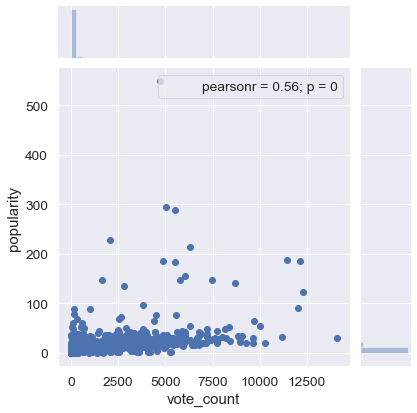

In [86]:
sns.jointplot(x='vote_count', y='popularity', data=df).annotate(stats.pearsonr)

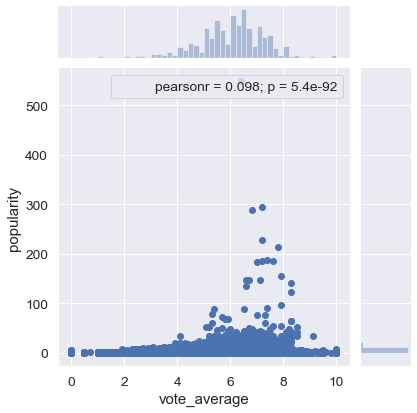

In [87]:
sns.jointplot(x='vote_average', y='popularity', data=gen_md).annotate(stats.pearsonr)

The vote count is not so correlated with popularity ($r = 0.56$).
The average vote value ($0\to10$) is not correlated with popularity at all. The more popular does not necessarily mean higher rating.

### cleaning: genres fillna

In [4]:
genres = (md['genres'].fillna('[]') # fillna
    .apply(literal_eval)) # turn rows from str to list

In [5]:
genres = (genres.apply(lambda x: [i['name'] for i in x] # 
    if isinstance(x, list) else [])) # if it is na then keeps the '[]' notation

In [88]:
md['genres'] = genres
md['genres']

0                        [Animation, Comedy, Family]
1                       [Adventure, Fantasy, Family]
2                                  [Romance, Comedy]
3                           [Comedy, Drama, Romance]
4                                           [Comedy]
5                   [Action, Crime, Drama, Thriller]
6                                  [Comedy, Romance]
7                 [Action, Adventure, Drama, Family]
8                      [Action, Adventure, Thriller]
9                      [Adventure, Action, Thriller]
10                          [Comedy, Drama, Romance]
11                                  [Comedy, Horror]
12                    [Family, Animation, Adventure]
13                                  [History, Drama]
14                               [Action, Adventure]
15                                    [Drama, Crime]
16                                  [Drama, Romance]
17                                   [Crime, Comedy]
18                        [Crime, Comedy, Adve

In [89]:
s = (md.apply(lambda x: pd.Series(x['genres']),axis=1)
     .stack()
     .reset_index(level=1, drop=True))

In [90]:
s.name = 'genre'
md['genres'].head()
gen_md = md.drop('genres', axis=1).join(s) # left join

We have seperate genres from list into one value:

In [92]:
gen_md['genre'].head()

0    Animation
0       Comedy
0       Family
1    Adventure
1      Fantasy
Name: genre, dtype: object

## The IMDB's weighted rating (wr) 

is given by 
$$\mathrm{Weighted Rating(WR)} = \left(\frac{v}{v+m}\cdot R\right)+\left(\frac{m}{v+m}\cdot C\right),$$
where
- $v$ is the number of votes for the movie;
- $m$ is the minimum votes required to be listed in the chart;
- $R$ is the average rating of the movie; And
- $C$ is the mean vote across the whole report

In [95]:
def weighted_rating(x, m, C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [103]:
def build_chart(genre, percentile=0.85):
    df = gen_md[gen_md['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile) #minimum votes required
    
    qualified = (df[(df['vote_count'] >= m) #only vote larger than m is considered 
                    & (df['vote_count'].notnull()) & (df['vote_average'].notnull())]
                 [['title', 'year', 'vote_count', 'vote_average', 'popularity']])
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    
    qualified['wr'] = weighted_rating(qualified, m, C)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    return qualified

In [104]:
build_chart('Crime', 0.90)

,title,year,vote_count,vote_average,popularity,wr
12481,The Dark Knight,2008,12269,8,123.167259,7.926567
292,Pulp Fiction,1994,8670,8,140.950236,7.897324
314,The Shawshank Redemption,1994,8358,8,51.645403,7.893652
834,The Godfather,1972,6024,8,41.109264,7.854816
46,Se7en,1995,5915,8,18.457430,7.852298
586,The Silence of the Lambs,1991,4549,8,4.307222,7.811259
289,Leon: The Professional,1994,4293,8,20.477329,7.800891
3030,The Green Mile,1999,4166,8,19.966780,7.795313
1057,Reservoir Dogs,1992,3821,8,12.220340,7.778453
1178,The Godfather: Part II,1974,3418,8,36.629307,7.754867


In [105]:
build_chart('Romance', 0.90)

,title,year,vote_count,vote_average,popularity,wr
10309,Dilwale Dulhania Le Jayenge,1995,661,9,34.457024,8.271289
351,Forrest Gump,1994,8147,8,48.307194,7.947552
876,Vertigo,1958,1162,8,18.208220,7.672104
40251,Your Name.,2016,1030,8,34.461252,7.635975
883,Some Like It Hot,1959,835,8,11.845107,7.565203
1132,Cinema Paradiso,1988,834,8,14.177005,7.564769
19901,Paperman,2012,734,8,7.198633,7.516517
37863,Sing Street,2016,669,8,10.672862,7.478971
882,The Apartment,1960,498,8,11.994281,7.345193
38718,The Handmaiden,2016,453,8,16.727405,7.297743


## Highest average  wieghted ratings among directors

### associate with credit dataset

In [150]:
credits = pd.read_csv(folder + 'credits.csv')

In [151]:
credits.columns

Index(['cast', 'crew', 'id'], dtype='object')

### cleaning: there are some abnormal id values:

In [152]:
md.loc[~md['id'].astype(str).str.isdigit(), 'id'].tolist()

['1997-08-20', '2012-09-29', '2014-01-01']

In [153]:
md = md.drop(md.loc[~md['id'].astype(str).str.isdigit()].index)

### dataset joining: merge credits to md:

In [154]:
md['id'] = md['id'].astype('int')
credits['id'] = credits['id'].astype('int')

In [155]:
md = md.merge(credits, on='id')

In [157]:
md.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [163]:
md['crew'] = md['crew'].apply(literal_eval)

In [164]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [195]:
md['director'] = md['crew'].apply(get_director)

### calculate the IDMB weighted rates:

In [196]:
vote_counts = md[md['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = md[md['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
m = vote_counts.quantile(0.90)
md['wr'] = weighted_rating(md, m, C)

### For average wr, we only consider director who directs at least 5 movies:

In [197]:
director_list = md.groupby('director')['wr'].count().sort_values(ascending=False)
director_list = list(director_list[director_list >= 5].index)

In [198]:
md[md['director'].isin(director_list)].groupby('director')['wr'].mean().sort_values(ascending=False).head(10)

director
Quentin Tarantino    7.356278
Christopher Nolan    7.287967
David Fincher        7.242511
Sergio Leone         7.167096
Matthew Vaughn       7.041863
J.J. Abrams          7.007311
Hayao Miyazaki       7.003895
Ron Clements         6.931581
Mel Gibson           6.929923
Joss Whedon          6.916572
Name: wr, dtype: float64